<a href="https://colab.research.google.com/github/niclacey/Cell-Packing/blob/main/Notochord_Classification_SVM_Restored.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook \#5: SVM, Perceptron, SGD, and PCA
**Due:** Tuesday 11/9, by 11:59pm

Name:

**Exercises**: \\
Build a **default model** for each of the following and then build a model with **one parameter tuned** (no need to include a graph, just change one parameter that hopefully results in a better model):
1. Support Vector Machines
2. Perceptron
3. Stochastic Gradient Descent
4. Run a PCA on the best model
5. Answer the conclusion questions


In [3]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
data= pd.read_csv('/content/SVM attempt.csv')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Number of Sheath Cells,Number of Interior Cells,Interior Volume constraint (per interior cell),Sheath Volume constraint (per sheath cell),Sheath to Medium Tension,Sheath to Interior Tension,Sheath to Sheath Tension,Interior to Interior Tension,Alpha (stm / sts),Beta (sti/sts),...,ratio non-corner and corner sheath pressures,Standard Deviation of Sheath Cell Values,Coefficient of Variation of non-corner sheath cell pressures,Body 10 [Interior],Body 11 [Interior],Average Interior Values (Pressure),ratio interior cell pressure,Inner aspect ratio,Outer Aspect Ratio,Total Flag
0,9,2,1.57,0.0723,0.050000,2.970000,3.660000,2.03000,0.01,0.81,...,0.77,1.38,0.46,1.082000,0.323000,0.703,0.299,1.109000,1.030000,bad
1,9,2,1.57,0.0723,0.520000,2.220000,4.420000,1.29000,0.12,0.50,...,0.75,2.42,1.19,-1.898000,-1.142000,-1.520,0.602,1.001000,1.024000,bad
2,9,2,1.57,0.0723,0.210000,2.320000,0.680000,1.41000,0.36,3.40,...,3.86,0.30,3.39,1.947235,1.904648,1.926,0.978,1.065221,1.054101,bad
3,9,2,1.57,0.0723,0.233678,2.974902,4.754603,3.30596,0.05,0.63,...,0.72,2.29,0.78,0.236605,-1.104918,-0.434,-4.670,1.014991,1.037155,bad
4,9,2,1.57,0.0723,0.790000,3.140000,4.580000,3.35000,0.17,0.68,...,0.50,2.65,1.73,1.096000,0.195000,-1.409,0.178,1.017000,1.038000,bad


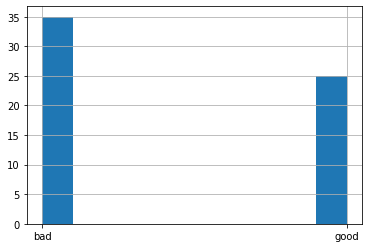

In [4]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

predictors = data.columns.drop('Total Flag') 
target = "Total Flag"

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
#Normalize Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)
train_sln.hist()
#now you can use train_data, test_data, train_sln, and test_sln

## Exercises:
1. Support Vector Classifier: \\
  a. Default \\
  b. Tuned

In [5]:
from google.colab import drive
import pandas as pd
import numpy
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

import matplotlib.pyplot as plt
from itertools import product
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
%matplotlib inline
#Default SVC
clf = SVC()
clf.fit(train_data,train_sln)
predictions = clf.predict(test_data)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions))
vals = data[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))



accuracy: 0.8666666666666667
        Pred bad  Pred good
T bad          5          1
T good         1          8


In [6]:
def plot_decision_boundary(data,x_name,y_name,target_name,clf):
    
    #list of the values appearing in the target column
    class_labels = data[target_name].unique()

    #converting from categorical target values to numbers so we can plot them with a contour plot
    target_col_nums = data[target_name].replace(to_replace=class_labels,value=range(len(data[target_name].unique())))

    #create a grid of points representing new cases that we need a prediction for
    #these will serve as the basis for drawing the contours
    x_points = numpy.linspace(data[x_name].min(), data[x_name].max(), 300)
    y_points = numpy.linspace(data[y_name].min(), data[y_name].max(), 300)
    X, Y = numpy.meshgrid(x_points,y_points)

    #train our classifier
    clf.fit(data[[x_name,y_name]],target_col_nums)

    #create the dataframe with all the points in our grid
    plot_points = pd.DataFrame(list(product(x_points,y_points)), columns=[x_name,y_name])

    #get predictions for each point in our grid
    predictions = pd.Series(clf.predict(plot_points))
    
    #predictions will be a big 1D array, so reshape them to 2-dimensions, same as the shape of the grid
    Z = predictions.values.reshape(X.shape)

    #draw the filled-in contours
    plt.contourf(X, Y, Z,cmap=plt.cm.coolwarm)

    #we will plot the training data using a scatter plot, so
    #need to grab the same number of colors used by contourf
    point_colors = plt.cm.coolwarm(numpy.linspace(0,1,len(class_labels)))

    #scatter plot each of the classes in our target column
    for curr_class in range(len(class_labels)):
        curr_subset = data[target_col_nums == curr_class]
        plt.scatter(curr_subset[x_name],curr_subset[y_name],color=point_colors[curr_class],edgecolors='k',label=class_labels[curr_class])
    
    #display the plot and accompanying info
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title(str(clf)+'\ntraining set accuracy:'+str(clf.score(data[[x_name,y_name]],target_col_nums)))
    legend = plt.legend(loc='lower right')
    legend.get_frame().set_facecolor('silver')
    plt.show()

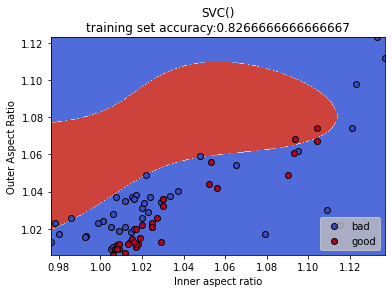

In [17]:
plot_decision_boundary(data, 'Inner aspect ratio', 'Outer Aspect Ratio', 'Total Flag', clf)

accuracy: 0.8666666666666667
        Pred bad  Pred good
T bad          5          1
T good         1          8


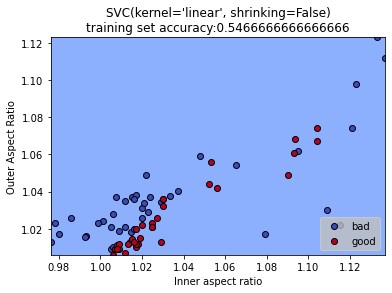

In [20]:
#Tuned SVC:
clf_tuned = SVC(kernel = 'linear', shrinking= False)
clf_tuned.fit(train_data,train_sln)
predictions = clf_tuned.predict(test_data)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions))
vals = data[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

plot_decision_boundary(data, 'Inner aspect ratio', 'Outer Aspect Ratio', 'Total Flag', clf_tuned)


2. Perceptron: \\
  a. Default \\
  b. Tuned

accuracy: 0.8666666666666667
        Pred bad  Pred good
T bad          5          1
T good         1          8


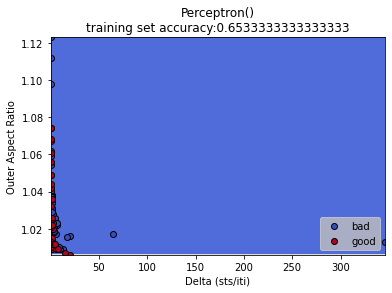

In [23]:
#Default Perceptron
dperc = Perceptron()
dperc.fit(train_data,train_sln)
predictions = dperc.predict(test_data)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions))
vals = data[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

plot_decision_boundary(data, 'Delta (sts/iti)', 'Outer Aspect Ratio', 'Total Flag', dperc)



accuracy: 0.8
        Pred bad  Pred good
T bad          5          1
T good         2          7


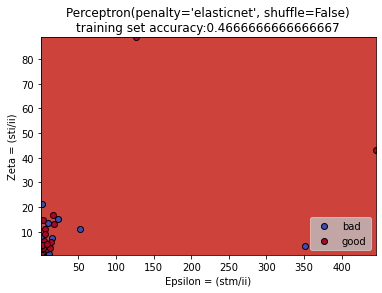

In [25]:
#Tuned Perceptron
tperc = Perceptron(penalty = 'elasticnet', shuffle = False)
tperc.fit(train_data,train_sln)
predictions = tperc.predict(test_data)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions))
vals = data[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

plot_decision_boundary(data, 'Epsilon = (stm/ii)', 'Zeta = (sti/ii)', 'Total Flag', tperc)

3. Stochastic Gradient Descent: \\
  a. Default \\
  b. Tuned

accuracy: 0.7333333333333333
        Pred bad  Pred good
T bad          5          1
T good         3          6


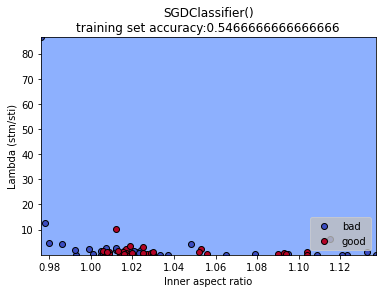

In [27]:
#Default SGD
dsgd = SGDClassifier()
dsgd.fit(train_data,train_sln)
predictions = dsgd.predict(test_data)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions))
vals = data[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

plot_decision_boundary(data, 'Inner aspect ratio', 'Lambda (stm/sti)', 'Total Flag', dsgd)

accuracy: 0.8666666666666667
        Pred bad  Pred good
T bad          6          0
T good         2          7


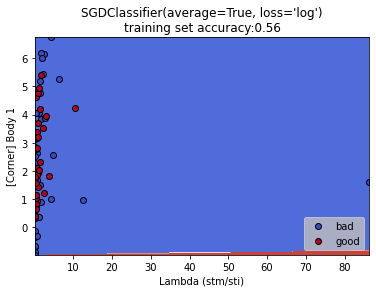

In [28]:
#Tuned SGD
tsgd = SGDClassifier(loss= 'log', average= True)
tsgd.fit(train_data,train_sln)
predictions = tsgd.predict(test_data)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions))
vals = data[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

plot_decision_boundary(data, 'Lambda (stm/sti)', '[Corner] Body 1', 'Total Flag', tsgd)

3. Now take the model that performed the best above and run a **principal component analysis** on it. 

[0.37577711 0.14024275]
accuracy: 0.4
        Pred bad  Pred good
T bad          6          0
T good         9          0


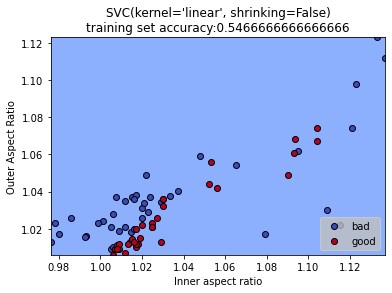

In [29]:
#PCA on best model
# a couple of models all performed with the same accuracy (only getting one wrong), so i'm going to use the tuned SVC.
from sklearn.decomposition import PCA
extractor = PCA(n_components = 2, whiten = True)
extractor.fit(train_data)
print(extractor.explained_variance_ratio_)

train_transformed = extractor.transform(train_data)
test_transformed = extractor.transform(test_data)

clf_tuned2 = SVC(kernel = 'linear', shrinking= False)
clf_tuned2.fit(train_transformed,train_sln)
predictions2 = clf_tuned2.predict(test_transformed)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions2))
vals = data[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions2, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

plot_decision_boundary(data, 'Inner aspect ratio', 'Outer Aspect Ratio', 'Total Flag', clf_tuned2)
